# **A Predictive Model**

## Objectives

* To summarise the key data and logic which led to the formation of our predictive model 
* To present the model itself and test it's accuracy 

## Inputs

* The clean and transformed DataFrame "df_transformed_1.csv"

## Outputs

* Linear regression model used to create new "Predicted_Cost" column

## Additional Comments

*  



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\Hackathon2_project_team3'

---

# Load Cleaned and Transformed Dataset

Before loading the dataset, I will import the required Python libraries.

In [4]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from feature_engine.imputation import CategoricalImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Now I will load the dataset.

In [5]:
df = pd.read_csv("Dataset/Transformed/df_transformed_1.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc,BMI_Cat
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0,Overweight
1,18,male,33.770,1,no,southeast,1725.55,1,1,1,Obese
2,28,male,33.000,3,no,southeast,4449.46,1,1,1,Obese
3,33,male,22.705,0,no,northwest,21984.47,1,1,2,Normal
4,32,male,28.880,0,no,northwest,3866.86,1,1,2,Overweight


---

# A Predictive Model

We have shown that **Age, **Smoker** and **BMI** are the 3 attributes that impact **Charges**. 

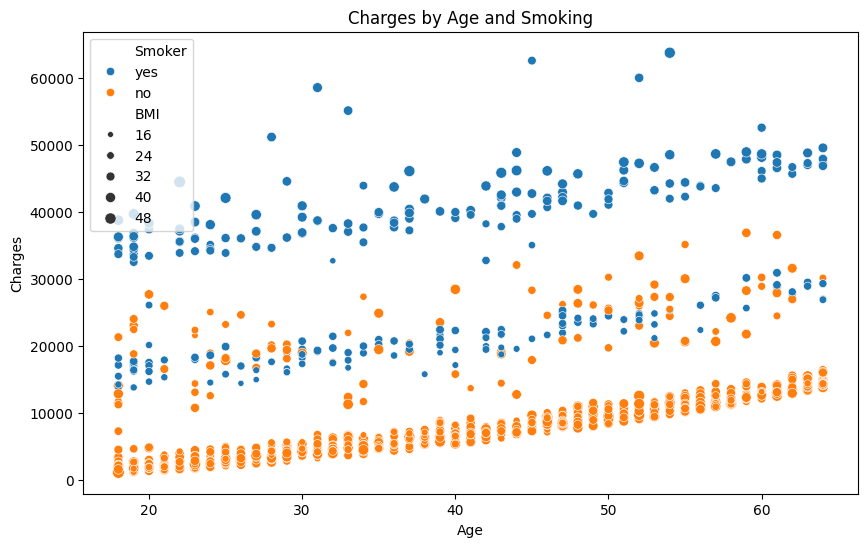

In [6]:
fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Charges', hue='Smoker', size='BMI')
plt.title("Charges by Age and Smoking")
plt.show()

To look at the separation in smokers dependant on BMI, I will add a new column to the DataFrame called **'Obese'**. If BMI < 30 (not obese), the value will be 0; if BMI <= 30, the value will be 1. 

In [7]:
df["Obese"] = df["BMI"].apply(lambda x: 0 if x < 30 else 1)

In [8]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc,BMI_Cat,Obese
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55,1,1,1,Obese,1
2,28,male,33.000,3,no,southeast,4449.46,1,1,1,Obese,1
3,33,male,22.705,0,no,northwest,21984.47,1,1,2,Normal,0
4,32,male,28.880,0,no,northwest,3866.86,1,1,2,Overweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.55,1,1,2,Obese,1
1333,18,female,31.920,0,no,northeast,2205.98,0,1,3,Obese,1
1334,18,female,36.850,0,no,southeast,1629.83,0,1,1,Obese,1
1335,21,female,25.800,0,no,southwest,2007.94,0,1,0,Overweight,0


Now I will plot **Age** vs. **Charges** and discriminate by **Obese** for smokers.

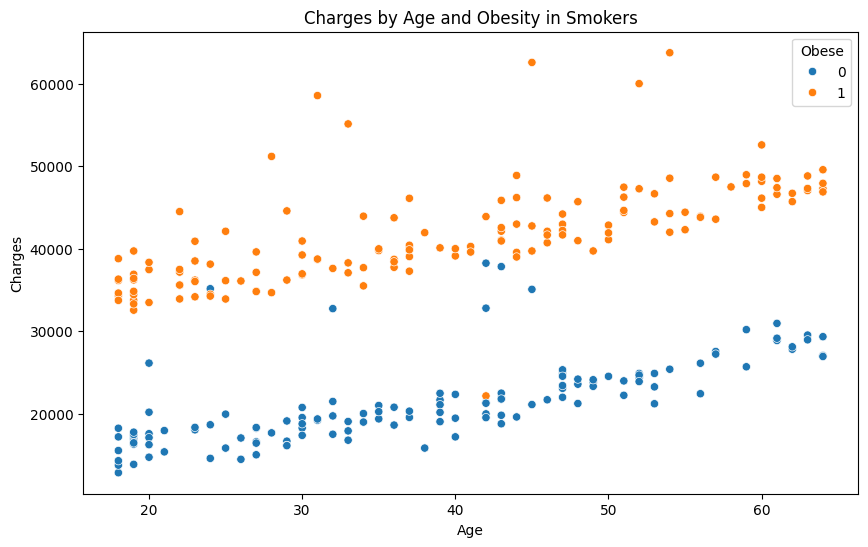

In [20]:
smokers_df = df[df['Smoker'] == 'yes']

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=smokers_df, x='Age', y='Charges', hue='Obese')
plt.title("Charges by Age and Obesity in Smokers")
plt.show()

This plot clearly shows the separation in charges based on age and obesity in smokers.

I will double check whether obesity is a factor in non=smokers aswell.

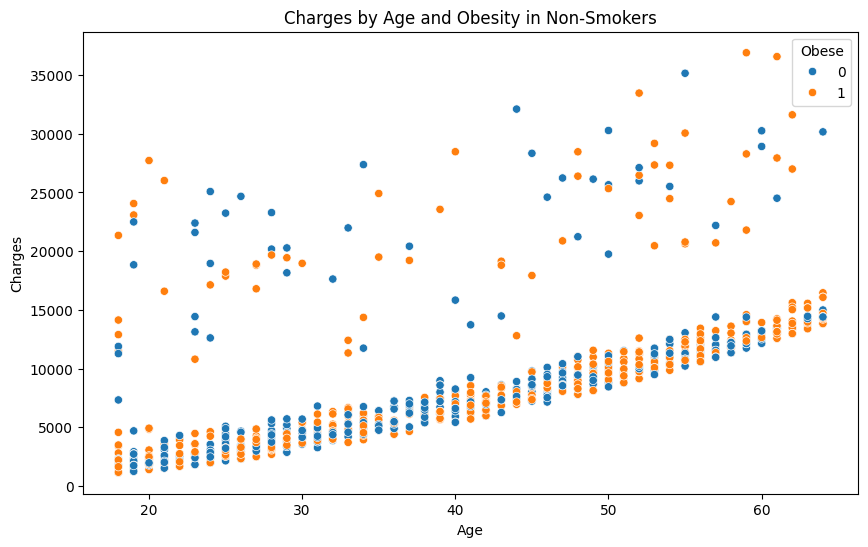

In [19]:
nonsmokers_df = df[df['Smoker'] == 'no']


fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=nonsmokers_df, x='Age', y='Charges', hue='Obese')
plt.title("Charges by Age and Obesity in Non-Smokers")
plt.show()

This scatter plot clearly shows obesity doesn't separate our non-smokers into the low and high charges groups.

I will double check if any of the other features/ attributes can be used to separate the non-smokers. 

First, let's look at **Sex**.

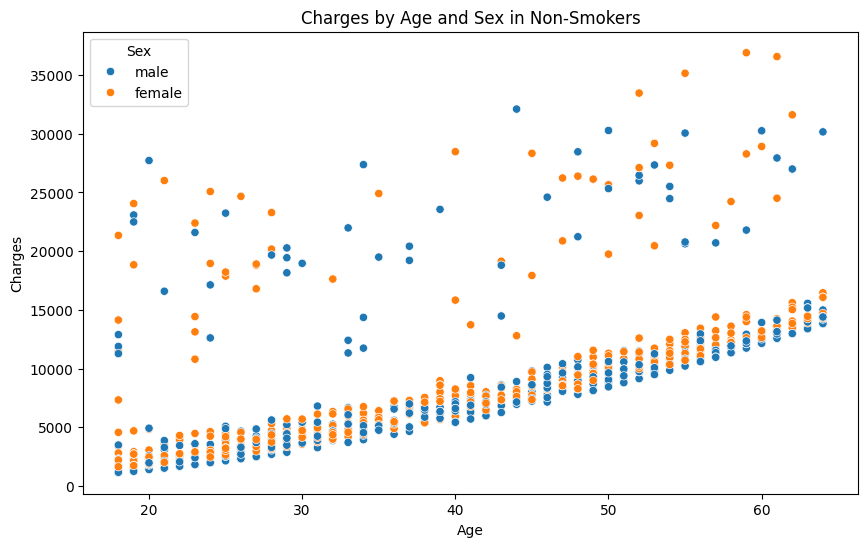

In [9]:
nonsmokers_df = df[df['Smoker'] == 'no']

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=nonsmokers_df, x='Age', y='Charges', hue='Sex')
plt.title("Charges by Age and Sex in Non-Smokers")
plt.show()

This analysis shows that sex doesn't separate the low and high charges in non-smokers.

Next, let's look at **Children**.

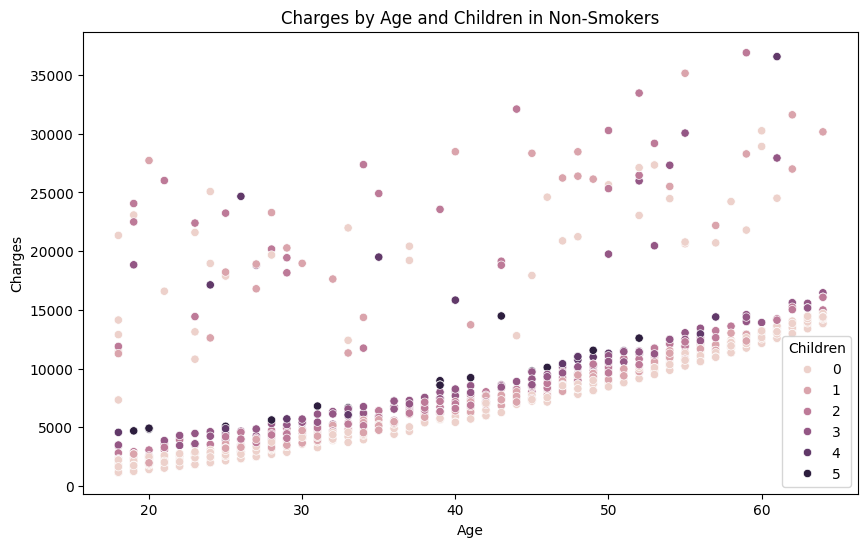

In [10]:
nonsmokers_df = df[df['Smoker'] == 'no']

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=nonsmokers_df, x='Age', y='Charges', hue='Children')
plt.title("Charges by Age and Children in Non-Smokers")
plt.show()

This analysis shows that number of children doesn't separate the low and high charges in non-smokers.

Lastly, let's look at **Region**.

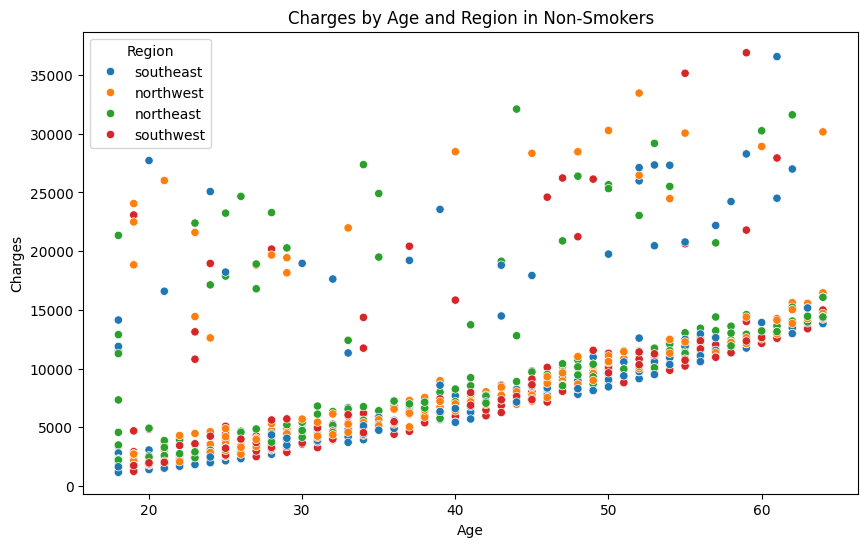

In [11]:
nonsmokers_df = df[df['Smoker'] == 'no']

fig, axes = plt.subplots(figsize=(10,6))
sns.scatterplot(data=nonsmokers_df, x='Age', y='Charges', hue='Region')
plt.title("Charges by Age and Region in Non-Smokers")
plt.show()

This analysis shows that region also doesn't separate the low and high charges in non-smokers.

We must conclude that if there are predictive attributes that could separate the non-smokers into the lower and higher charge groups, it hasn't been captured in this dataset. 

It is possible that there are no attributes that can predict who will incur low or high charges i.e. it could be due to accidents, sporadic illness (e.g. infections) or those we don't fully understand (e.g. cancer). 

Next, I want to make a linear regression model for 3 groups: non=smokers; smokers with BMI under 30; and smokers with BMI >= 30.

I will model the non=smokers first. We will consider this the low risk group.

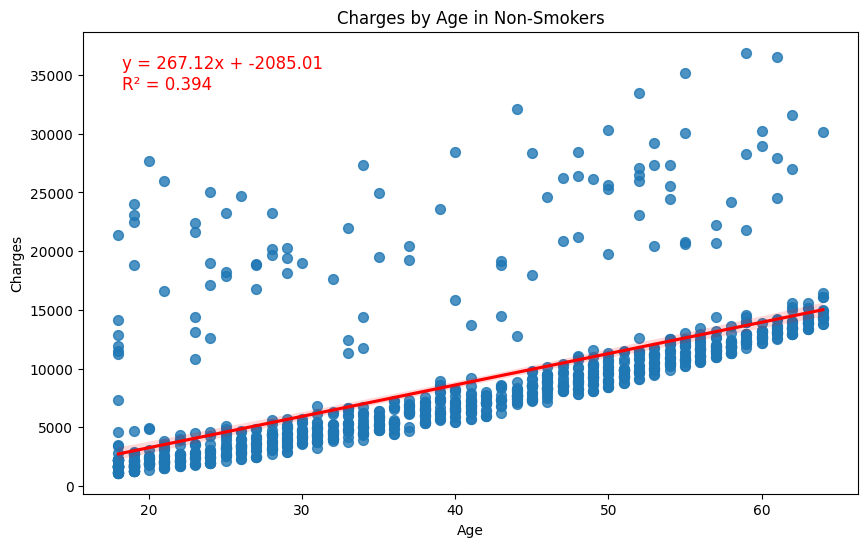

In [ ]:
nonsmokers_df = df[df['Smoker'] == 'no']

# Help from ChatGPT to get slope, intercept, and R²
# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Scatterplot with regression line
sns.regplot(data=nonsmokers_df, x='Age', y='Charges', ax=ax, 
            scatter_kws={'s': 50}, line_kws={"color": "red"})

# Fit linear regression model
X = nonsmokers_df["Age"].values.reshape(-1,1)
y = nonsmokers_df["Charges"].values
model = LinearRegression().fit(X, y)

# Get slope, intercept, and R²
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Equation text with R²
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.3f}"

# Place equation on plot
ax.text(0.05, 0.95, equation, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', color="red")

# Title
ax.set_title("Charges by Age in Non-Smokers")
plt.show()

The R^2 value (0.394) tells us that the model/ trendline explains ~40 % of the variation in charges. Unfortunately, we cannot do better than this with the data available.

Next, I will model smokers with BMI < 30. This will be the moderate risk group.

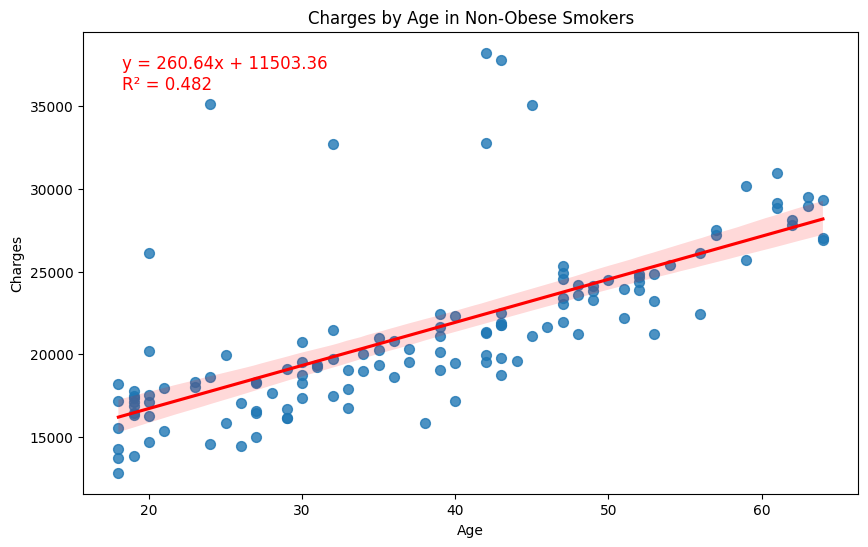

In [ ]:
smokers_low_df = df[(df['Smoker'] == 'yes') & (df['Obese'] == 0)]

# Help from ChatGPT to get slope, intercept, and R²
# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Scatterplot with regression line
sns.regplot(data=smokers_low_df, x='Age', y='Charges', ax=ax, 
            scatter_kws={'s': 50}, line_kws={"color": "red"})

# Fit linear regression model
X = smokers_low_df["Age"].values.reshape(-1,1)
y = smokers_low_df["Charges"].values
model = LinearRegression().fit(X, y)

# Get slope, intercept, and R²
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Equation text with R²
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.3f}"

# Place equation on plot
ax.text(0.05, 0.95, equation, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', color="red")

# Title
ax.set_title("Charges by Age in Non-Obese Smokers")
plt.show()

The R^2 value (0.482) tells us that the model/ trendline explains ~48 % of the variation in charges.

Next, I will model the smokers with BMI >= 30. This is the high risk group.

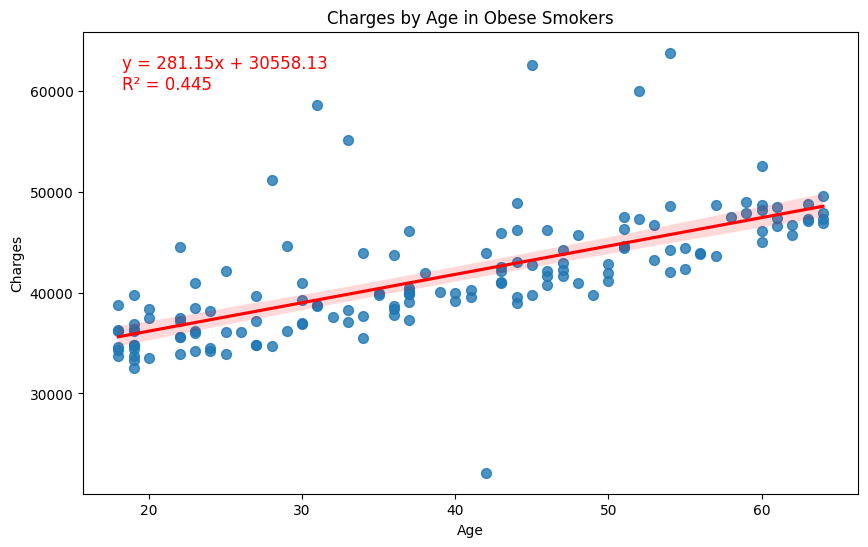

In [15]:
smokers_high_df = df[(df['Smoker'] == 'yes') & (df['Obese'] == 1)]

# Help from ChatGPT to get slope, intercept, and R²
# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Scatterplot with regression line
sns.regplot(data=smokers_high_df, x='Age', y='Charges', ax=ax, 
            scatter_kws={'s': 50}, line_kws={"color": "red"})

# Fit linear regression model
X = smokers_high_df["Age"].values.reshape(-1,1)
y = smokers_high_df["Charges"].values
model = LinearRegression().fit(X, y)

# Get slope, intercept, and R²
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Equation text with R²
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.3f}"

# Place equation on plot
ax.text(0.05, 0.95, equation, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', color="red")

# Title
ax.set_title("Charges by Age in Obese Smokers")
plt.show()

The R^2 value (0.445) tells us that the model/ trendline explains ~45 % of the variation in charges.

To better understand the accuracy of this as a whole, I am going to use the 3 models to predict health insurances charges for the population of the dataset. I will put the predicted charges in a new column called **'Predicted_Cost'**.

In [17]:
# Help from ChatGPT to create structure

conditions = [
    (df['Smoker_enc'] == 1),                          # case 1
    ((df['Smoker_enc'] == 0) & (df['Obese'] == 0) )   # case 2
]

choices = [
    df['Age'] * 267.12 - 2085.01,                     # formula if Smoker_enc == 0
    df['Age'] * 260.64 + 11503.36                     # formula if Smoker_enc + Obese == 1
]

# Default (otherwise case)
default = df['Age'] * 281.15 + 30558.13

df['Predicted_Cost'] = np.select(conditions, choices, default=default)

In [18]:
df

,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_enc,Smoker_enc,Region_enc,BMI_Cat,Obese,Predicted_Cost
0,19,female,27.900,0,yes,southwest,16884.92,0,0,0,Overweight,0,16455.52
1,18,male,33.770,1,no,southeast,1725.55,1,1,1,Obese,1,2723.15
2,28,male,33.000,3,no,southeast,4449.46,1,1,1,Obese,1,5394.35
3,33,male,22.705,0,no,northwest,21984.47,1,1,2,Normal,0,6729.95
4,32,male,28.880,0,no,northwest,3866.86,1,1,2,Overweight,0,6462.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.55,1,1,2,Obese,1,11270.99
1333,18,female,31.920,0,no,northeast,2205.98,0,1,3,Obese,1,2723.15
1334,18,female,36.850,0,no,southeast,1629.83,0,1,1,Obese,1,2723.15
1335,21,female,25.800,0,no,southwest,2007.94,0,1,0,Overweight,0,3524.51


I beleieve we can see that **Charges** and **Predicted_Cost** approximate quite well. I am going to compare the sums of both columns below.

In [19]:
# Compute sums
total_charges = df['Charges'].sum()
total_predicted = df['Predicted_Cost'].sum()

# Difference
difference = total_predicted - total_charges

# Ratio (Predicted / Actual)
ratio = total_predicted / total_charges

# Print nicely
print("Total Charges:        ", total_charges)
print("Total Predicted Cost: ", total_predicted)
print("Difference:           ", difference)
print("Ratio (Pred/Actual):  ", ratio)

Total Charges:         17754185.450000003
Total Predicted Cost:  17754239.25
Difference:            53.79999999701977
Ratio (Pred/Actual):   1.0000030302713774


We find that overall, the model is very accurate for this dataset. The difference between the sum of all **Charges** and sum of all **Predicted_Cost** is 53.80, and gives a ratio of 1.00 to 2 decimal places.

Lastly, I will plot them against each other and get the R^2.

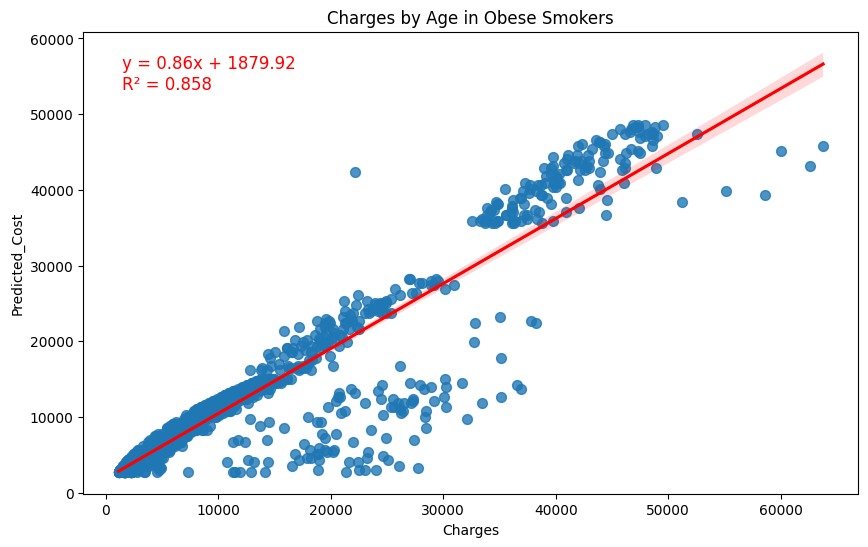

In [20]:
# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Scatterplot with regression line
sns.regplot(data=df, x='Charges', y='Predicted_Cost', ax=ax, 
            scatter_kws={'s': 50}, line_kws={"color": "red"})

# Fit linear regression model
X = df["Charges"].values.reshape(-1,1)
y = df["Predicted_Cost"].values
model = LinearRegression().fit(X, y)

# Get slope, intercept, and R²
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Equation text with R²
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.3f}"

# Place equation on plot
ax.text(0.05, 0.95, equation, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', color="red")

# Title
ax.set_title("Charges by Age in Obese Smokers")
plt.show()

We can see that as a whole, this model is able to explain ~86 % of the variation in health insurance charges.  

I will now save this DataFrame as 'df_model.csv'.

In [21]:
df.to_csv("Dataset/Model/df_model.csv", index=False)

---

# Conclusion and Next Steps

In this notebook we have summrised key data and built a linear regression model which accurately predicts charges for dataset as a whole, and explains ~86 % of the variation in health insurance charges.

The next step is to use this model to make an interactive element in Power BI which can be used to stratify potential customers and predict charges.